In [1]:
import numpy as np
import pandas as pd
import math

import tensorflow as tf
import tensorflow_datasets as tfds

from scipy.io import loadmat
from scipy.stats import chisquare
import scipy.cluster.hierarchy as hc

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering, DBSCAN

import matplotlib.pyplot as plt

In [2]:
NBA = pd.read_csv('https://sports-statistics.com/database/basketball-data/nba/2018-19_pbp.csv')
NBA.columns

Index(['Unnamed: 0', 'EVENTMSGACTIONTYPE', 'EVENTMSGTYPE', 'EVENTNUM',
       'GAME_ID', 'HOMEDESCRIPTION', 'NEUTRALDESCRIPTION', 'PCTIMESTRING',
       'PERIOD', 'PERSON1TYPE', 'PERSON2TYPE', 'PERSON3TYPE', 'PLAYER1_ID',
       'PLAYER1_NAME', 'PLAYER1_TEAM_ABBREVIATION', 'PLAYER1_TEAM_CITY',
       'PLAYER1_TEAM_ID', 'PLAYER1_TEAM_NICKNAME', 'PLAYER2_ID',
       'PLAYER2_NAME', 'PLAYER2_TEAM_ABBREVIATION', 'PLAYER2_TEAM_CITY',
       'PLAYER2_TEAM_ID', 'PLAYER2_TEAM_NICKNAME', 'PLAYER3_ID',
       'PLAYER3_NAME', 'PLAYER3_TEAM_ABBREVIATION', 'PLAYER3_TEAM_CITY',
       'PLAYER3_TEAM_ID', 'PLAYER3_TEAM_NICKNAME', 'SCORE', 'SCOREMARGIN',
       'VISITORDESCRIPTION', 'WCTIMESTRING'],
      dtype='object')

In [83]:
a = pd.crosstab(NBA['PLAYER1_TEAM_ABBREVIATION'], NBA['PLAYER2_TEAM_ABBREVIATION'])
a

PLAYER2_TEAM_ABBREVIATION,ATL,BKN,BOS,CHA,CHI,CLE,DAL,DEN,DET,GSW,...,OKC,ORL,PHI,PHX,POR,SAC,SAS,TOR,UTA,WAS
PLAYER1_TEAM_ABBREVIATION,,,,,,,,,,,,,,,,,,,,,
ATL,4603,114,142,132,129,102,80,70,99,58,...,69,133,130,67,64,70,48,100,68,140
BKN,99,3955,118,119,100,108,69,59,97,63,...,60,76,137,52,67,57,52,130,58,113
BOS,132,112,4180,111,60,103,59,49,122,62,...,69,75,117,54,53,60,39,129,61,72
CHA,111,111,102,3903,76,84,55,57,104,39,...,66,93,133,63,51,48,42,67,50,117
CHI,137,118,85,84,3526,107,75,59,97,57,...,85,106,107,56,48,63,43,110,49,106
CLE,94,124,114,106,97,3454,48,53,105,39,...,65,79,77,62,45,49,55,122,53,124
DAL,58,57,53,41,56,59,3880,82,58,100,...,137,45,55,122,114,85,116,64,129,53
DEN,57,71,55,63,43,61,95,4122,52,106,...,132,51,56,128,111,88,115,46,136,52
DET,100,96,125,111,108,129,62,56,3488,44,...,63,100,141,58,54,58,47,89,68,95


In [69]:
b = pd.crosstab(NBA['PLAYER1_TEAM_ABBREVIATION'], NBA['PLAYER3_TEAM_ABBREVIATION'])
b

PLAYER3_TEAM_ABBREVIATION,ATL,BKN,BOS,CHA,CHI,CLE,DAL,DEN,DET,GSW,...,OKC,ORL,PHI,PHX,POR,SAC,SAS,TOR,UTA,WAS
PLAYER1_TEAM_ABBREVIATION,,,,,,,,,,,,,,,,,,,,,
ATL,40,17,33,20,24,6,16,11,21,14,...,11,24,22,10,12,5,17,11,10,16
BKN,14,39,34,21,25,13,6,14,15,14,...,13,25,16,8,15,5,9,15,14,15
BOS,25,20,32,19,8,7,5,10,15,11,...,13,17,20,12,5,7,9,16,9,13
CHA,31,30,28,20,16,14,10,19,29,18,...,12,21,36,11,20,8,12,25,8,23
CHI,24,9,16,19,32,16,10,12,21,16,...,9,28,31,10,10,11,7,30,19,30
CLE,20,26,24,25,19,27,10,10,23,14,...,21,13,19,18,13,9,11,22,15,14
DAL,8,4,8,14,8,4,37,15,6,25,...,16,8,15,24,23,17,13,10,29,8
DEN,17,15,15,13,10,6,5,27,11,33,...,22,7,8,26,15,12,22,9,27,8
DET,15,12,18,21,19,9,12,6,51,10,...,12,19,30,10,9,14,12,8,9,16


In [82]:
c = pd.crosstab(NBA['PLAYER2_TEAM_ABBREVIATION'], NBA['PLAYER3_TEAM_ABBREVIATION'])
c

PLAYER3_TEAM_ABBREVIATION,ATL,BKN,BOS,CHA,CHI,CLE,DAL,DEN,DET,GSW,...,OKC,ORL,PHI,PHX,POR,SAC,SAS,TOR,UTA,WAS
PLAYER2_TEAM_ABBREVIATION,,,,,,,,,,,,,,,,,,,,,
ATL,27,2,2,0,3,3,2,0,2,0,...,1,2,2,0,3,0,1,0,1,3
BKN,0,36,0,0,1,4,1,0,1,1,...,0,0,2,1,0,1,0,0,0,1
BOS,3,2,35,0,2,1,2,0,3,0,...,1,0,1,1,1,1,1,1,1,1
CHA,4,5,1,24,1,1,0,1,2,1,...,1,3,3,0,1,1,1,2,1,2
CHI,4,1,0,2,36,1,0,0,3,1,...,3,1,1,0,1,0,0,1,2,3
CLE,0,3,1,2,2,22,1,1,3,2,...,0,1,1,0,1,1,1,0,1,4
DAL,0,1,1,0,0,0,28,1,1,1,...,1,1,1,0,2,2,3,1,0,0
DEN,1,2,0,2,1,0,0,28,1,3,...,3,1,0,3,1,1,1,0,4,1
DET,0,2,1,1,0,1,0,0,37,0,...,0,1,1,0,0,1,0,0,1,3


Constructed 30x30 matrixes for number of interactions the teams had with each other.

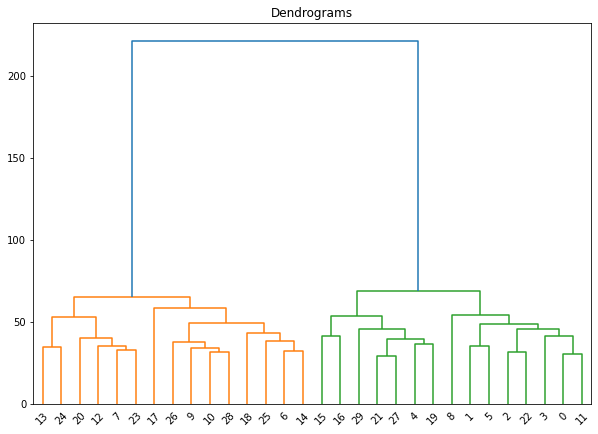

In [84]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(b, method='ward'))

With the b matrix above, constructed a hiearchical clustering model.
